# Finding the Best Markets to Advertise in

The project is to help gain a knowledge about e-learning company products - courses about programing, data science, game development. Our fake company is mostly fosuses on web and mobile development.

The goal of the projest to find out two best markets to optimize invests in advertisment.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
coders_surveys = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
coders_surveys.shape

(18175, 136)

In [4]:
coders_surveys.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
coders_surveys.columns.values

array(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber',
       'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls',
       'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev',
       'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool',
       'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge',
       'CodeEventRailsGirls', 'CodeEventStartUpWknd',
       'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen',
       'CountryLive', 'EmploymentField', 'EmploymentFieldOther',
       'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning',
       'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther',
       'HasChildren', 'HasDebt', 'HasFinancialDependents',
       'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary',
       'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x',
       'ID.y',

Organizing own survey could be very expensive, so it is cheaper to use the data which already exists. Great source is freeCodeCamp survey which contain relevant data. FreeCodeCamp is a free e-learning platform that offers courses on web development. Data could be downloaded from https://github.com/freeCodeCamp/2017-new-coder-survey

In [6]:
coders_surveys["JobRoleInterest"].value_counts().head()

Full-Stack Web Developer     823
  Front-End Web Developer    450
  Data Scientist             152
Back-End Web Developer       142
  Mobile Developer           117
Name: JobRoleInterest, dtype: int64

Freqency table of roles which people are interested allows to tell if it is a good population for our purposes. First of all it is visible that people are interested in many subjects. It is not the problem, because that means that people are probably not decided clearly and that means that people still could be interested in one of choosen courses. What more in order to be professional it is need to have a broad knowledge from many fields. Let see how many people are insterested in more than one subject.

In [7]:
many_interests_idx = coders_surveys["JobRoleInterest"].value_counts().index.str.contains(",")
coders_many_interests = coders_surveys["JobRoleInterest"].value_counts()[many_interests_idx].sum()
print("There are {} from {} coders which are interests in more than one subjects".format(coders_many_interests,len(coders_surveys)))

There are 4779 from 18175 coders which are interests in more than one subjects


As we are interested only in surveys which contains intrests, let's drop all the not answered rows.

In [8]:
coders_surveys_updated = coders_surveys.dropna(subset=["JobRoleInterest"], 
                                              axis=0)

In [9]:
coders_surveys_updated["CountryLive"].value_counts().head()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64

In [10]:
(coders_surveys_updated["CountryLive"].value_counts(normalize=True)*100).head()

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Name: CountryLive, dtype: float64

It seems that most important markets are USA, India, UK, and Canada which takes more than 50% of all markets. What's more those countries are English speaking. It is also necessary to know which markets are willing to spend money on courses. We need to know how much each participant in most popular countries spend on courses in month.

In [11]:
countries = ["United States of America","India","United Kingdom","Canada","Poland"]
coders_surveys_cleaned = coders_surveys_updated[coders_surveys_updated["CountryLive"].isin(countries)]
coders_surveys_cleaned.shape

(4359, 136)

In [12]:
coders_surveys_cleaned["MonthsProgramming"].replace(0,1, inplace = True)
coders_surveys_cleaned[coders_surveys_cleaned["MonthsProgramming"]==0]
coders_surveys_cleaned["MoneyPerMonth"] = coders_surveys_cleaned["MoneyForLearning"]/coders_surveys_cleaned["MonthsProgramming"]

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [13]:
coders_surveys_cleaned["MoneyPerMonth"].isnull().sum()

322

In [14]:
coders_surveys_cleaned = coders_surveys_cleaned.dropna(subset=["MoneyPerMonth","CountryLive"], 
                                                      axis=0)

In [15]:
coders_surveys_cleaned.shape

(4037, 137)

In [16]:
grouped_money_per_month = coders_surveys_cleaned.groupby("CountryLive")["MoneyPerMonth"]

In [17]:
grouped_money_per_month.mean()

CountryLive
Canada                      113.510961
India                       135.100982
Poland                       75.678935
United Kingdom               45.534443
United States of America    227.997996
Name: MoneyPerMonth, dtype: float64

In [18]:
grouped_money_per_month.median()

CountryLive
Canada                      0.000000
India                       0.000000
Poland                      0.333333
United Kingdom              0.000000
United States of America    3.333333
Name: MoneyPerMonth, dtype: float64

Participants from USA on average spend most of the money, and the UK spend the least amount. What more most of the participants in all countries, except USA did not spend any money on courses. It is interesting that countries which are richer than India like Canada or UK, spend less money. 

(0, 10000)

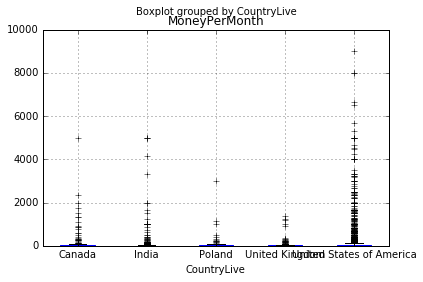

In [69]:
coders_surveys_cleaned.boxplot(column = ["MoneyPerMonth"],by='CountryLive')
plt.ylim(0,10000)

In [70]:
coders_surveys_cleaned[(coders_surveys_cleaned["MoneyPerMonth"]>3000)&(india_canada_idx)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


There are some outliers in the data. For example there are only few people in india which paid more than 3000 dollars. Since most of those people did not attend any bootcamp it is not justified to see such high values. We can remove them from dataset.

In [71]:
india_canada_idx = (coders_surveys_cleaned["CountryLive"] == "India")|(coders_surveys_cleaned["CountryLive"]=="Canada")
usa_idx = coders_surveys_outliers_removed["CountryLive"]=="United States of America"
#drop india and canada outliers 
coders_surveys_outliers_removed = coders_surveys_cleaned.drop(
    coders_surveys_cleaned[(coders_surveys_cleaned["MoneyPerMonth"]>3000)&(india_canada_idx)].index
)
#drop usa outliers
coders_surveys_outliers_removed = coders_surveys_outliers_removed.drop(
    coders_surveys_outliers_removed[(coders_surveys_cleaned["MoneyPerMonth"]>5000)&(usa_idx)].index
)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [72]:
coders_surveys_outliers_removed.groupby("CountryLive")["MoneyPerMonth"].mean()

CountryLive
Canada                       93.065400
India                        65.758763
Poland                       75.678935
United Kingdom               45.534443
United States of America    138.982678
Name: MoneyPerMonth, dtype: float64

After removing outliers data is more reliable. The most important market which should be advertised is USA. Country has a lot of coders which are willing to pay the most in comparision to other countries. As a second country to advertise I would choose India. However Canadian participants are willing to pay more, the average difference participants spent in month is only ~17 dollars and India has twice more participants than Canada.

I would split the available budget by spending 15% for India and 85% for USA. Firstly because USA has 45% of all participants. Secondly, USA's participants spend twice much than Inidians. I think that focusing only on one county is a bad idea, because market is changing very fast, and it is good to have client from different countries. It could be profitable in feature to advertise other country than USA even only by 15% of all company budget. India is growing in people who are willing to programming.